In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mb
import sklearn

### Step 1: Import necessary dataframes for geosmin concentrations at Marston Reservoir - df_geosmin

In [2]:
#conduit 20 geosmin entries
conduit20_geosmin = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\conduit20_geosmin.csv')

#reservoir sampling geosmin entries
sample_res_geosmin = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\sample_res_geosmin.csv')

#water treatment plant samples
wtp_samples_geosmin = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\wtp_samples_geosmin.csv')

#water treatment plant influent geosmin entries
wtp_influent_geosmin = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\wtp_influent_geosmin.csv')

In [3]:
frames = [conduit20_geosmin, sample_res_geosmin, wtp_influent_geosmin, wtp_samples_geosmin]
df_geosmin = pd.concat(frames)

In [4]:
#check final dataframe for geosmin values
df_geosmin

,SAMPLE_NUMBER,SAMPLED_DATE,SAMPLE_NAME,SAMPLING_POINT_DESCRIPTION,SITE,FACILITY,ANALYTE,FORMATTED_ENTRY,UNITS,DEPTH
0,233240,2/4/2013 10:27,WS-LP-021,NaN,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,2.14,ng/L,NaN
1,556579,4/22/2019 10:22,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,3.00,ng/L,NaN
2,558288,4/30/2019 11:35,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,4.00,ng/L,NaN
3,562497,5/7/2019 10:01,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,5.00,ng/L,NaN
4,564659,5/21/2019 8:26,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,4.00,ng/L,NaN
...,...,...,...,...,...,...,...,...,...,...
122,1088836,5/24/2022 9:32,PL-MAR-MLOWM,Marston WTP MLOW Mid,Marston WTP MLOW Mid,Marston WTP,Geosmin,2.00,ng/L,MLOWM
123,1114355,5/26/2022 15:22,PL-MAR-MLOWM-A-4,NaN,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,MLOWM
124,1088837,5/31/2022 9:01,PL-MAR-MLOWM,Marston WTP MLOW Mid,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,MLOWM
125,1119241,6/2/2022 9:07,PL-MAR-MLOWM-A-4,NaN,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,MLOWM


In [5]:
df_geosmin.to_csv('df_geosmin.csv', index=False)

### Step 2: Import necessary dataframes for nutrient information - df_full

In [6]:
ms_above_conf_nut = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\ms_above_conf_nut_filled.csv')
nf_above_conf_nut = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\nf_above_conf_nut_filled.csv')
downstream_strontia_nut = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\downstream_strontia_nut_filled.csv')
upstream_strontia_nut = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\upstream_strontia_nut_filled.csv')
sp_below_chat_nut = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\sp_below_chat_nut_filled.csv')

In [7]:
#reset indices to ease merging of dataframes
ms_above_conf_nut.reset_index(drop=True, inplace=True)
nf_above_conf_nut.reset_index(drop = True, inplace= True)
downstream_strontia_nut.reset_index(drop=True, inplace=True)
upstream_strontia_nut.reset_index(drop=True, inplace=True)
sp_below_chat_nut.reset_index(drop=True, inplace=True)

In [8]:
#concat is not working, use merge function as well
df_full = ms_above_conf_nut.merge(nf_above_conf_nut, on=['Date'], how='outer')

In [9]:
df_full = df_full.merge(downstream_strontia_nut, on=['Date'], how='outer')
df_full = df_full.merge(upstream_strontia_nut, on=['Date'], how='outer')
df_full = df_full.merge(sp_below_chat_nut, on=['Date'], how = 'outer')

In [10]:
df_full

,Date,"Adjusted TOC, MS Above Conf.","Adjusted TP, MS Above Conf.","Adjusted turbidity, MS Above Conf.","Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia","Adjusted TOC, Upstream Strontia","Adjusted TP, Upstream Strontia","Adjusted turbidity, Upstream Strontia","Adjusted TOC, SP Below Chatfield","Adjusted TP, SP Below Chatfield","Adjusted turbidity, SP Below Chatfield"
0,6/1/2012,2.500000,0.020339,0.200000,2.400000,0.025372,5.400000,3.600000,0.014000,3.100000,2.600000,0.036923,4.800000,2.400000,0.018248,1.900000
1,6/2/2012,2.490000,0.020785,0.215919,2.500522,0.025767,5.062842,3.610119,0.014282,3.048457,2.736381,0.036160,4.666055,2.388701,0.036322,1.632015
2,6/3/2012,2.480000,0.021241,0.233105,2.597330,0.026147,4.736982,3.618391,0.014554,2.997941,2.867953,0.035415,4.537670,2.380480,0.053748,1.380444
3,6/4/2012,2.470000,0.021707,0.251659,2.690423,0.026512,4.422420,3.624815,0.014815,2.948450,2.994718,0.034687,4.414844,2.375337,0.070526,1.145285
4,6/5/2012,2.460000,0.022183,0.271690,2.779803,0.026862,4.119157,3.629392,0.015066,2.899985,3.116675,0.033978,4.297577,2.373273,0.086655,0.926538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,6/27/2022,3.244595,0.023010,4.199058,2.979046,0.015812,6.014642,2.569160,0.017053,2.331630,3.020314,0.009394,5.715335,4.043297,0.069535,8.422129
3679,6/28/2022,3.233388,0.023254,4.386381,3.008835,0.015734,6.084747,2.525783,0.017285,2.284832,3.040042,0.009162,5.773119,4.044972,0.074167,8.679552
3680,6/29/2022,3.222220,0.023500,4.582062,3.038921,0.015655,6.155668,2.483140,0.017520,2.238974,3.059898,0.008936,5.831487,4.046647,0.079108,8.944844
3681,6/30/2022,3.211091,0.023749,4.786471,3.069309,0.015577,6.227416,2.441216,0.017758,2.194036,3.079884,0.008715,5.890446,4.048323,0.084379,9.218244


### Import dataframes for water temperature at locations and flow/air temperatures - df_flows_temp

In [11]:
#waterton gage data - flow rate and water temperature calculations
waterton_data = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\waterton_data.csv')

#cheesman and roberts tunnel data + strontia temp data
ch_rt_data = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\cheesman_roberts_flow_temp_data.csv')

#conduit 20 and marston reservoir data (flow, air temperature)
cond20_mar_data = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\marston_cond20_flow_temp_data.csv')


#water temp data from different points

#nf above confluence
nf_above_conf_temp = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\nf_above_conf_temp_filled.csv')

#ms above confluence
ms_above_conf_temp = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\ms_above_conf_temp_filled.csv')

#upstream strontia
upstream_strontia_temp = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\upstream_strontia_temp_filled.csv')

#downstream strontia
downstream_strontia_temp = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\downstream_strontia_temp_filled.csv')

#sp below chatfield
sp_below_chat_temp = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\sp_below_chat_temp_filled.csv')

In [12]:
#reset indices for the water temperature dataframes
ms_above_conf_temp.reset_index(drop=True, inplace=True)
nf_above_conf_temp.reset_index(drop=True, inplace=True)
upstream_strontia_temp.reset_index(drop=True, inplace=True)
downstream_strontia_temp.reset_index(drop=True, inplace=True)
sp_below_chat_temp.reset_index(drop=True, inplace=True)

In [13]:
#cleaning up names
nf_above_conf_temp = nf_above_conf_temp.rename(columns = {'Water Temp':'Water Temperature, NF above Confluence'})

In [14]:
ms_above_conf_temp = ms_above_conf_temp.rename(columns = {'Water Temp':'Water Temperature, MS above Confluence'})
upstream_strontia_temp = upstream_strontia_temp.rename(columns = {'Water Temp':'Water Temperature, Upstream Strontia'})
downstream_strontia_temp = downstream_strontia_temp.rename(columns = {'Water Temp':'Water Temperature, Downstream Strontia'})
sp_below_chat_temp = sp_below_chat_temp.rename(columns = {'Water Temp':'Water Temperature, SP Below Chatfield'})

In [15]:
#merging water temperature dataframes
df_water_temp = ms_above_conf_temp.merge(nf_above_conf_temp, on=['Date'], how='outer')

In [16]:
df_water_temp = df_water_temp.merge(upstream_strontia_temp, on = ['Date'], how = 'outer')
df_water_temp = df_water_temp.merge(downstream_strontia_temp, on = ['Date'], how = 'outer')
df_water_temp = df_water_temp.merge(sp_below_chat_temp, on = ['Date'], how = 'outer')

In [17]:
#final dataframe for water temperatures
df_water_temp

,Date,"Water Temperature, MS above Confluence","Water Temperature, NF above Confluence","Water Temperature, Upstream Strontia","Water Temperature, Downstream Strontia","Water Temperature, SP Below Chatfield"
0,6/1/2012,14.554844,8.586489,9.083256,15.358337,17.075902
1,6/2/2012,14.333172,8.872917,9.453704,15.236844,17.543801
2,6/3/2012,14.121086,9.148626,9.813862,15.117757,17.999793
3,6/4/2012,13.918585,9.413614,10.163730,15.001076,18.443879
4,6/5/2012,13.725671,9.667884,10.503308,14.886802,18.876058
...,...,...,...,...,...,...
3677,6/26/2022,14.239519,12.581977,12.237893,14.646480,21.242407
3678,6/27/2022,14.191289,12.565539,12.189940,14.716511,21.293677
3679,6/28/2022,14.143223,12.549122,12.142175,14.786877,21.345071
3680,6/29/2022,14.095320,12.532727,12.094597,14.857580,21.396590


In [18]:
df_final = df_full.merge(df_water_temp, on=['Date'], how = 'outer')

## Import datafiles for flow and air temperatures

In [19]:
#merge different datasets
df_flows_temp = waterton_data.merge(ch_rt_data, on=['Date '], how='outer')
df_flows_temp = df_flows_temp.merge(cond20_mar_data, on = ['Date '], how = 'outer')

In [20]:
ch_rt_data

,Date,South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),"Cheesman Air Temperature, Low (C)","Water Temperature, Cheesman, low (C)","Cheesman Air Temperature, High (C)","Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)"
0,6/1/2012,125.0,225.0,9.444444,10.971844,25.555556,19.455956,261.250000,26.111111,7.222222
1,6/2/2012,123.0,225.0,8.888889,10.679289,27.777778,20.626178,261.250000,26.666667,7.222222
2,6/3/2012,121.0,225.0,9.444444,10.971844,28.333333,20.918733,261.250000,28.888889,11.666667
3,6/4/2012,125.0,225.0,10.555556,11.556956,28.333333,20.918733,245.100000,28.888889,11.666667
4,6/5/2012,130.0,225.0,10.000000,11.264400,24.444444,18.870844,216.679167,27.777778,13.888889
...,...,...,...,...,...,...,...,...,...,...
3677,6/26/2022,114.0,77.6,9.444444,10.971844,20.000000,16.530400,327.666700,28.333333,11.666667
3678,6/27/2022,142.0,77.2,-17.777778,-3.363378,8.888889,10.679289,380.708300,31.666667,13.333333
3679,6/28/2022,161.0,76.9,11.666667,12.142067,30.000000,21.796400,388.750000,31.111111,13.333333
3680,6/29/2022,163.0,77.0,13.888889,13.312289,28.333333,20.918733,388.875000,24.444444,9.444444


In [21]:
df_flows_temp = df_flows_temp.dropna(subset = ['South Platte Below Cheesman Downstream (cfs) '])

In [22]:
df_flows_temp

,Date,Waterton Gage (cfs),"Temp Ch, C (high)","Chatfield, Low Temp (C)","Waterton Gage, High Water Temp (C)","Waterton Gage, Low Water Temp (C)",South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),"Cheesman Air Temperature, Low (C)","Water Temperature, Cheesman, low (C)","Cheesman Air Temperature, High (C)","Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)"
0,6/1/2012,47.4,27.8,10.0,19.65216,9.04870,125.0,225.0,9.444444,10.971844,25.555556,19.455956,261.250000,26.111111,7.222222,43.80,63.80,22.777778,8.333333
1,6/2/2012,47.9,27.8,12.8,19.65216,10.71666,123.0,225.0,8.888889,10.679289,27.777778,20.626178,261.250000,26.666667,7.222222,43.80,63.80,27.222222,11.111111
2,6/3/2012,47.4,31.1,12.2,21.61797,10.35924,121.0,225.0,9.444444,10.971844,28.333333,20.918733,261.250000,28.888889,11.666667,45.60,65.60,23.888889,10.555556
3,6/4/2012,45.4,32.2,17.2,22.27324,13.33774,125.0,225.0,10.555556,11.556956,28.333333,20.918733,245.100000,28.888889,11.666667,42.94,62.94,31.111111,13.888889
4,6/5/2012,45.3,28.3,16.7,19.95001,13.03989,130.0,225.0,10.000000,11.264400,24.444444,18.870844,216.679167,27.777778,13.888889,43.65,63.65,31.666667,15.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,6/26/2022,179.0,19.4,11.1,14.64828,9.70397,114.0,77.6,9.444444,10.971844,20.000000,16.530400,327.666700,28.333333,11.666667,112.58,112.58,18.333333,12.222222
3678,6/27/2022,157.0,30.6,12.2,21.32012,10.35924,142.0,77.2,-17.777778,-3.363378,8.888889,10.679289,380.708300,31.666667,13.333333,86.66,86.66,18.333333,11.111111
3679,6/28/2022,151.0,33.9,11.1,23.28593,9.70397,161.0,76.9,11.666667,12.142067,30.000000,21.796400,388.750000,31.111111,13.333333,81.65,81.65,28.888889,12.222222
3680,6/29/2022,152.0,32.8,16.1,22.63066,12.68247,163.0,77.0,13.888889,13.312289,28.333333,20.918733,388.875000,24.444444,9.444444,81.64,81.64,32.777778,16.666667


In [23]:
df_flows_temp = df_flows_temp.rename(columns = {'Date ':'Date'})

In [24]:
ch_rt_data

,Date,South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),"Cheesman Air Temperature, Low (C)","Water Temperature, Cheesman, low (C)","Cheesman Air Temperature, High (C)","Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)"
0,6/1/2012,125.0,225.0,9.444444,10.971844,25.555556,19.455956,261.250000,26.111111,7.222222
1,6/2/2012,123.0,225.0,8.888889,10.679289,27.777778,20.626178,261.250000,26.666667,7.222222
2,6/3/2012,121.0,225.0,9.444444,10.971844,28.333333,20.918733,261.250000,28.888889,11.666667
3,6/4/2012,125.0,225.0,10.555556,11.556956,28.333333,20.918733,245.100000,28.888889,11.666667
4,6/5/2012,130.0,225.0,10.000000,11.264400,24.444444,18.870844,216.679167,27.777778,13.888889
...,...,...,...,...,...,...,...,...,...,...
3677,6/26/2022,114.0,77.6,9.444444,10.971844,20.000000,16.530400,327.666700,28.333333,11.666667
3678,6/27/2022,142.0,77.2,-17.777778,-3.363378,8.888889,10.679289,380.708300,31.666667,13.333333
3679,6/28/2022,161.0,76.9,11.666667,12.142067,30.000000,21.796400,388.750000,31.111111,13.333333
3680,6/29/2022,163.0,77.0,13.888889,13.312289,28.333333,20.918733,388.875000,24.444444,9.444444


In [25]:
df_final = df_final.rename(columns = {'Date ':'Date'})

In [26]:
df_final = df_final.merge(df_flows_temp, on = ['Date'], how = 'outer')

## Final Dataframe = df_final

In [27]:
#FINAL DATAFRAME
df_final

,Date,"Adjusted TOC, MS Above Conf.","Adjusted TP, MS Above Conf.","Adjusted turbidity, MS Above Conf.","Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia",...,"Water Temperature, Cheesman, low (C)","Cheesman Air Temperature, High (C)","Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)"
0,6/1/2012,2.500000,0.020339,0.200000,2.400000,0.025372,5.400000,3.600000,0.014000,3.100000,...,10.971844,25.555556,19.455956,261.250000,26.111111,7.222222,43.80,63.80,22.777778,8.333333
1,6/2/2012,2.490000,0.020785,0.215919,2.500522,0.025767,5.062842,3.610119,0.014282,3.048457,...,10.679289,27.777778,20.626178,261.250000,26.666667,7.222222,43.80,63.80,27.222222,11.111111
2,6/3/2012,2.480000,0.021241,0.233105,2.597330,0.026147,4.736982,3.618391,0.014554,2.997941,...,10.971844,28.333333,20.918733,261.250000,28.888889,11.666667,45.60,65.60,23.888889,10.555556
3,6/4/2012,2.470000,0.021707,0.251659,2.690423,0.026512,4.422420,3.624815,0.014815,2.948450,...,11.556956,28.333333,20.918733,245.100000,28.888889,11.666667,42.94,62.94,31.111111,13.888889
4,6/5/2012,2.460000,0.022183,0.271690,2.779803,0.026862,4.119157,3.629392,0.015066,2.899985,...,11.264400,24.444444,18.870844,216.679167,27.777778,13.888889,43.65,63.65,31.666667,15.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,6/27/2022,3.244595,0.023010,4.199058,2.979046,0.015812,6.014642,2.569160,0.017053,2.331630,...,-3.363378,8.888889,10.679289,380.708300,31.666667,13.333333,86.66,86.66,18.333333,11.111111
3679,6/28/2022,3.233388,0.023254,4.386381,3.008835,0.015734,6.084747,2.525783,0.017285,2.284832,...,12.142067,30.000000,21.796400,388.750000,31.111111,13.333333,81.65,81.65,28.888889,12.222222
3680,6/29/2022,3.222220,0.023500,4.582062,3.038921,0.015655,6.155668,2.483140,0.017520,2.238974,...,13.312289,28.333333,20.918733,388.875000,24.444444,9.444444,81.64,81.64,32.777778,16.666667
3681,6/30/2022,3.211091,0.023749,4.786471,3.069309,0.015577,6.227416,2.441216,0.017758,2.194036,...,11.556956,23.333333,18.285733,388.875000,23.888889,9.444444,81.76,81.76,32.222222,17.222222


In [28]:
#drop rows with not full information
df_final = df_final.dropna(subset = ['Cheesman Air Temperature, High (C)'])

In [29]:
df_final

,Date,"Adjusted TOC, MS Above Conf.","Adjusted TP, MS Above Conf.","Adjusted turbidity, MS Above Conf.","Adjusted TOC, NF Above Conf.","Adjusted TP, NF Above Conf.","Adjusted turbidity, NF Above Conf.","Adjusted TOC, Downstream Strontia","Adjusted TP, Downstream Strontia","Adjusted turbidity, Downstream Strontia",...,"Water Temperature, Cheesman, low (C)","Cheesman Air Temperature, High (C)","Water Temperature, Cheesman, high (C)",Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)","Strontia Springs Temperature, low (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),"Marston Temperature, high (C)","Marston Temperature, low (C)"
0,6/1/2012,2.500000,0.020339,0.200000,2.400000,0.025372,5.400000,3.600000,0.014000,3.100000,...,10.971844,25.555556,19.455956,261.250000,26.111111,7.222222,43.80,63.80,22.777778,8.333333
1,6/2/2012,2.490000,0.020785,0.215919,2.500522,0.025767,5.062842,3.610119,0.014282,3.048457,...,10.679289,27.777778,20.626178,261.250000,26.666667,7.222222,43.80,63.80,27.222222,11.111111
2,6/3/2012,2.480000,0.021241,0.233105,2.597330,0.026147,4.736982,3.618391,0.014554,2.997941,...,10.971844,28.333333,20.918733,261.250000,28.888889,11.666667,45.60,65.60,23.888889,10.555556
3,6/4/2012,2.470000,0.021707,0.251659,2.690423,0.026512,4.422420,3.624815,0.014815,2.948450,...,11.556956,28.333333,20.918733,245.100000,28.888889,11.666667,42.94,62.94,31.111111,13.888889
4,6/5/2012,2.460000,0.022183,0.271690,2.779803,0.026862,4.119157,3.629392,0.015066,2.899985,...,11.264400,24.444444,18.870844,216.679167,27.777778,13.888889,43.65,63.65,31.666667,15.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,6/26/2022,3.255840,0.022769,4.019734,2.949552,0.015891,5.945346,2.613281,0.016824,2.379386,...,10.971844,20.000000,16.530400,327.666700,28.333333,11.666667,112.58,112.58,18.333333,12.222222
3678,6/27/2022,3.244595,0.023010,4.199058,2.979046,0.015812,6.014642,2.569160,0.017053,2.331630,...,-3.363378,8.888889,10.679289,380.708300,31.666667,13.333333,86.66,86.66,18.333333,11.111111
3679,6/28/2022,3.233388,0.023254,4.386381,3.008835,0.015734,6.084747,2.525783,0.017285,2.284832,...,12.142067,30.000000,21.796400,388.750000,31.111111,13.333333,81.65,81.65,28.888889,12.222222
3680,6/29/2022,3.222220,0.023500,4.582062,3.038921,0.015655,6.155668,2.483140,0.017520,2.238974,...,13.312289,28.333333,20.918733,388.875000,24.444444,9.444444,81.64,81.64,32.777778,16.666667


## Fix the geosmin dataframe to spit out dates properly

In [30]:
df_geosmin_updated = pd.read_csv(r'C:\Users\MJHATA\OneDrive - Denver Water\Documents\Python Scripts\df_geosmin_updated.csv')

In [31]:
df_geosmin_updated.reset_index(drop=True, inplace=True)

In [36]:
df_geosmin_updated

,SAMPLE_NUMBER,SAMPLED_DATE,SAMPLE_NAME,SAMPLING_POINT_DESCRIPTION,SITE,FACILITY,ANALYTE,FORMATTED_ENTRY,UNITS,DEPTH,Target,Date,Time
0,233240,2/4/2013 10:27,WS-LP-021,NaN,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,2.14,ng/L,NaN,FRBY,2/4/2013,10:27:00
1,556579,4/22/2019 10:22,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,3.00,ng/L,NaN,FRBY,4/22/2019,10:22:00
2,558288,4/30/2019 11:35,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,4.00,ng/L,NaN,FRBY,4/30/2019,11:35:00
3,562497,5/7/2019 10:01,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,5.00,ng/L,NaN,FRBY,5/7/2019,10:01:00
4,564659,5/21/2019 8:26,WS-LP-021,Conduit #20 at Marston Forebay Influent,Conduit #20 at Marston Forebay Influent,Marston Forebay,Geosmin,4.00,ng/L,NaN,FRBY,5/21/2019,8:26:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,1088836,5/24/2022 9:32,PL-MAR-MLOWM,Marston WTP MLOW Mid,Marston WTP MLOW Mid,Marston WTP,Geosmin,2.00,ng/L,NaN,MLOWM,5/24/2022,9:32:00
633,1114355,5/26/2022 15:22,PL-MAR-MLOWM-A-4,NaN,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,4,MLOWM,5/26/2022,15:22:00
634,1088837,5/31/2022 9:01,PL-MAR-MLOWM,Marston WTP MLOW Mid,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,NaN,MLOWM,5/31/2022,9:01:00
635,1119241,6/2/2022 9:07,PL-MAR-MLOWM-A-4,NaN,Marston WTP MLOW Mid,Marston WTP,Geosmin,3.00,ng/L,4,MLOWM,6/2/2022,9:07:00


## PCA Development

In [38]:
#make copy of predictor variable dataframe
df_final_copy = df_final.copy()

In [39]:
df_final_copy.dtypes

Date                                                  object
Adjusted TOC, MS Above Conf.                         float64
Adjusted TP, MS Above Conf.                          float64
Adjusted turbidity, MS Above Conf.                   float64
Adjusted TOC, NF Above Conf.                         float64
Adjusted TP, NF Above Conf.                          float64
Adjusted turbidity, NF Above Conf.                   float64
Adjusted TOC, Downstream Strontia                    float64
Adjusted TP, Downstream Strontia                     float64
Adjusted turbidity, Downstream Strontia              float64
Adjusted TOC, Upstream Strontia                      float64
Adjusted TP, Upstream Strontia                       float64
Adjusted turbidity, Upstream Strontia                float64
Adjusted TOC, SP Below Chatfield                     float64
Adjusted TP, SP Below Chatfield                      float64
Adjusted turbidity, SP Below Chatfield               float64
Water Temperature, MS ab

In [40]:
#merge with df_geosmin_updated to only get values from dates
result = pd.merge(df_final_copy, df_geosmin_updated, on= "Date")

#cleaning of result
result = result.drop(columns = ['SAMPLE_NUMBER','SAMPLING_POINT_DESCRIPTION','SITE','ANALYTE','Time','FACILITY','SAMPLED_DATE'])

In [42]:
df2 = result.columns.to_numpy()
df2 = df2.tolist()

In [43]:
df2.remove('Date')
df2.remove('SAMPLE_NAME')

#keeping the geosmin readings
df2.remove('FORMATTED_ENTRY')
df2.remove('UNITS')
df2.remove('DEPTH')
df2.remove('Target')

## removing flows from this point 
df2.remove('Waterton Gage (cfs)')
df2.remove('South Platte Above Cheesman Flowrate (cfs)')
df2.remove('South Platte Below Cheesman Downstream (cfs) ')
df2.remove('Roberts Tunnel Flowrate (cfs)')
df2.remove('Conduit 20 to Marston Total (No Chatfield water) ')
df2.remove('Conduit 20 (with Chatfield flow) (cfs)')

## removing a temperature
#df2.remove('Chatfield, Low Temp (C)')

In [44]:
#need to standardiza the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = df2

#separating out the features
x = result.loc[:, features].values
#separate out the target
y = result.loc[:,['Target']].values 
#standardize the features
x = StandardScaler().fit_transform(x)


In [46]:
#standardized data from the "features" dataframe, which is just a copy of the combined "results" dataframe
df_standard = pd.DataFrame(data = x, columns = features)

In [47]:
#capture 80% of variance
pca_factors = PCA(n_components= 0.80)
principalComp = pca_factors.fit_transform(x)

principalDF = pd.DataFrame(data = principalComp, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PCA8'])

In [48]:
principalDF.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PCA8
0,-6.267302,2.872819,2.306376,1.600939,2.222945,-0.644013,3.058793,-0.509435
1,-4.738987,3.054951,2.652664,1.461160,1.650406,-0.343513,2.255181,0.165981
2,-5.348096,1.783414,2.498211,0.908515,1.494905,-0.925863,1.276097,0.816930
3,-4.655285,1.500109,2.360876,0.576124,0.896792,-0.707796,0.382311,1.356584
4,-4.655285,1.500109,2.360876,0.576124,0.896792,-0.707796,0.382311,1.356584


In [49]:
result[['Target']].head()
finalDf = pd.concat([principalDF, result[['Target']]], axis = 1)

In [50]:
finalDf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PCA8,Target
0,-6.267302,2.872819,2.306376,1.600939,2.222945,-0.644013,3.058793,-0.509435,RES_SAM
1,-4.738987,3.054951,2.652664,1.461160,1.650406,-0.343513,2.255181,0.165981,RES_SAM
2,-5.348096,1.783414,2.498211,0.908515,1.494905,-0.925863,1.276097,0.816930,RES_SAM
3,-4.655285,1.500109,2.360876,0.576124,0.896792,-0.707796,0.382311,1.356584,RES_SAM
4,-4.655285,1.500109,2.360876,0.576124,0.896792,-0.707796,0.382311,1.356584,RES_SAM
...,...,...,...,...,...,...,...,...,...
632,-3.715715,0.499428,-0.524087,-0.108325,-1.682101,0.205990,-0.283724,-0.569360,FRBY
633,-3.715715,0.499428,-0.524087,-0.108325,-1.682101,0.205990,-0.283724,-0.569360,INF
634,-3.665644,0.510459,0.228498,0.306918,-1.415157,-0.194001,-0.240158,-0.621050,FRBY
635,-3.665644,0.510459,0.228498,0.306918,-1.415157,-0.194001,-0.240158,-0.621050,MLOWM


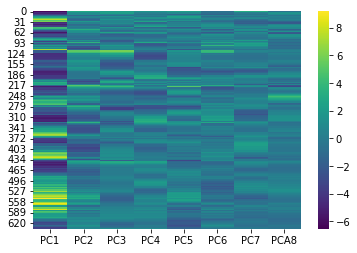

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(principalDF, annot=False, cmap ='viridis')

In [52]:
pca_factors.explained_variance_ratio_.cumsum()

array([0.46212042, 0.54798177, 0.61608164, 0.67230152, 0.72287693,
       0.76148253, 0.79479377, 0.82287365])

In [53]:
pc1 = pca_factors.components_[0]
pc2 = pca_factors.components_[1]
pc3 = pca_factors.components_[2]
pc4 = pca_factors.components_[3]
pc5 = pca_factors.components_[4]

In [54]:
pc1

array([ 0.01328751, -0.0918603 , -0.02796777, -0.1104492 , -0.01417272,
       -0.10117118, -0.04969105, -0.06770449, -0.11816557,  0.02012277,
       -0.0606366 , -0.08386381, -0.03346771, -0.07520296, -0.11880915,
       -0.22821115, -0.2235773 , -0.21258263, -0.23725205, -0.23536302,
       -0.20426916, -0.23273657, -0.20426916, -0.23273657, -0.24538055,
       -0.24538055, -0.23835453, -0.23835453, -0.23943993, -0.25004158,
       -0.22461484, -0.24467303])

In [55]:
pc2

array([ 0.16444206,  0.25433149, -0.05192109,  0.26703304,  0.41816446,
        0.23906834,  0.11591221,  0.11280901,  0.02539511,  0.23313499,
        0.36650146,  0.14094903,  0.21826263,  0.24996044, -0.10274828,
        0.15054335,  0.1401708 ,  0.15137387,  0.03854588,  0.07283526,
       -0.21853628, -0.15063225, -0.21853628, -0.15063225, -0.0284298 ,
       -0.0284298 , -0.09977544, -0.09977544, -0.09611033, -0.01933601,
       -0.04219665, -0.02004082])

In [56]:
pc3

array([-0.30564534, -0.35945544,  0.11991541,  0.22084093, -0.01148768,
        0.30868137, -0.37399594, -0.03877554, -0.34594538,  0.07492374,
       -0.3267777 , -0.01321069,  0.21141162,  0.35158542,  0.17555441,
        0.03122068,  0.04936559,  0.00413202,  0.01016847, -0.00317489,
       -0.09813223, -0.08545724, -0.09813223, -0.08545724,  0.02602861,
        0.02602861,  0.04524917,  0.04524917,  0.04117068,  0.01670161,
        0.03024759,  0.01750173])

In [57]:
pc4

array([-0.08415197,  0.27689431,  0.46048247, -0.22922201, -0.22815046,
       -0.14657682, -0.16356772, -0.34635853, -0.08346079,  0.35815165,
        0.19833449,  0.2070689 , -0.22373211,  0.11942672,  0.30754234,
        0.07805448,  0.06791744,  0.13239259,  0.0366853 ,  0.07658264,
       -0.02288766, -0.0105669 , -0.02288766, -0.0105669 , -0.05070897,
       -0.05070897, -0.06243415, -0.06243415, -0.05314531, -0.02874669,
       -0.0296424 , -0.02947055])

In [58]:
pc5

array([ 0.29718661,  0.29293485, -0.29009948, -0.13715776,  0.11717177,
       -0.17916461, -0.3844539 , -0.07128287, -0.35244438,  0.02121355,
        0.19110164, -0.42363682,  0.02493146,  0.2583594 ,  0.05759807,
       -0.12332771, -0.09137073, -0.12266876, -0.08452736, -0.04097463,
        0.05404183,  0.01813731,  0.05404183,  0.01813731,  0.04572408,
        0.04572408,  0.10459044,  0.10459044,  0.09697678,  0.06196195,
        0.12866375,  0.05526124])

In [59]:
n = pca_factors.components_.shape[0]
important = [np.abs(pca_factors.components_[i]).argmax() for i in range(n)]
important_names = [features[important[i]] for i in range(n)]
important_variables= {'PC{}'.format(i+1): important_names[i] for i in range(n)}
important_variables_f= pd.DataFrame(important_variables.items())

In [60]:
important_variables_f

,0,1
0,PC1,"Strontia Springs Temperature, low (C)"
1,PC2,"Adjusted TP, NF Above Conf."
2,PC3,"Adjusted TOC, Downstream Strontia"
3,PC4,"Adjusted turbidity, MS Above Conf."
4,PC5,"Adjusted turbidity, Upstream Strontia"
5,PC6,"Adjusted turbidity, Upstream Strontia"
6,PC7,"Adjusted TOC, Upstream Strontia"
7,PC8,"Adjusted TOC, SP Below Chatfield"


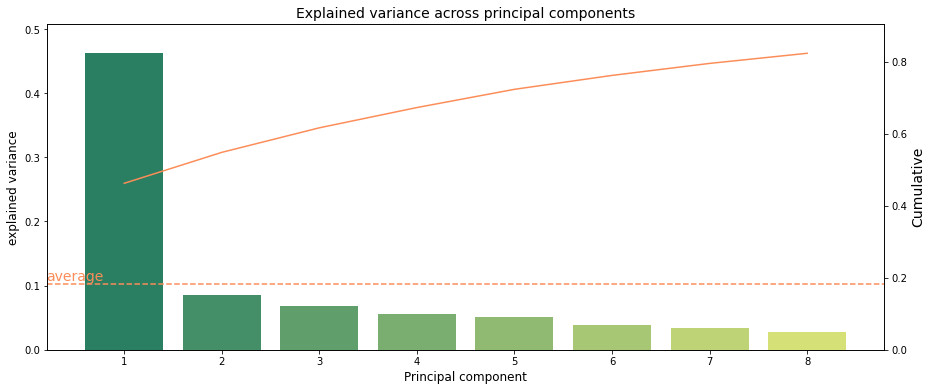

In [61]:
#basic information
n_components = len(pca_factors.explained_variance_ratio_)
explained_variance = pca_factors.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components) + 1

df_exp_variance = pd.DataFrame([explained_variance, cum_explained_variance], index=['explained variance', 'cumulative'], columns=idx).T

mean_explained_variance = df_exp_variance.iloc[:,0].mean() # calculate mean explained variance

limit = 38
if limit > 0:
    limit_df = limit
else:
    limit_df = n_components

df_explained_variance_limited = df_exp_variance.iloc[:limit_df,:]
#make scree plot
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title('Explained variance across principal components', fontsize=14)
ax1.set_xlabel('Principal component', fontsize=12)
ax1.set_ylabel('Explained variance', fontsize=12)
ax2 = sns.barplot(x=idx[:limit_df], y='explained variance', data=df_explained_variance_limited, palette='summer')
ax2 = ax1.twinx()
ax2.grid(False)
ax2.set_ylabel('Cumulative', fontsize=14)
ax2 = sns.lineplot(x=idx[:limit_df]-1, y='cumulative', data=df_explained_variance_limited, color='#fc8d59')
ax1.axhline(mean_explained_variance, ls='--', color='#fc8d59') #plot mean
ax1.text(-.8, mean_explained_variance+(mean_explained_variance*.05), "average", color='#fc8d59', fontsize=14) #label y axis
max_y1 = max(df_explained_variance_limited.iloc[:,0])
max_y2 = max(df_explained_variance_limited.iloc[:,1])
ax1.set(ylim=(0, max_y1+max_y1*.1))
ax2.set(ylim=(0, max_y2+max_y2*.1))
plt.show()

Factor Loadings of 1st PC

Top 4 highest
----------------------------------------
Adjusted TOC, Upstream Strontia       0.020123
Adjusted TOC, MS Above Conf.          0.013288
Adjusted TP, NF Above Conf.          -0.014173
Adjusted turbidity, MS Above Conf.   -0.027968
Name: 0, dtype: float64 

Top 4 lowest
----------------------------------------
Strontia Springs Temperature, low (C)   -0.250042
Water Temperature, Cheesman, low (C)    -0.245381
Cheesman Air Temperature, Low (C)       -0.245381
Marston Temperature, low (C)            -0.244673
Name: 0, dtype: float64
Factor Loadings of 2nd PC

Top 4 highest
----------------------------------------
Adjusted TP, NF Above Conf.       0.418164
Adjusted TP, Upstream Strontia    0.366501
Adjusted TOC, NF Above Conf.      0.267033
Adjusted TP, MS Above Conf.       0.254331
Name: 1, dtype: float64 

Top 4 lowest
----------------------------------------
Waterton Gage, High Water Temp (C)   -0.218536
Temp Ch, C (high)                    -0.21853

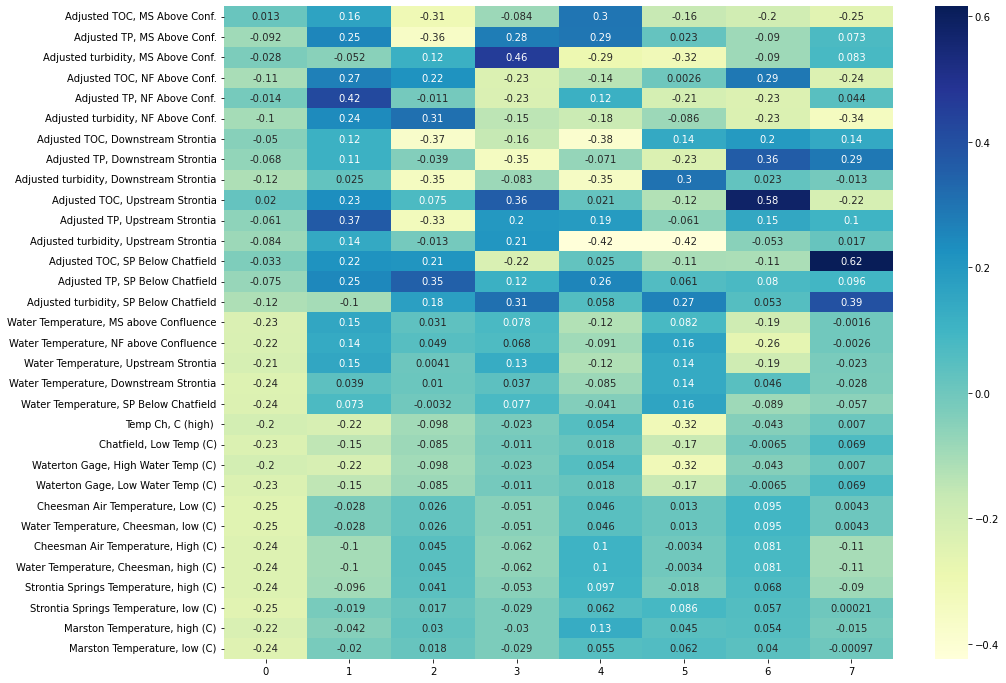

In [65]:
top_pc = 8
top_k = 4

df_c = pd.DataFrame(pca_factors.components_, columns=features).T

#1st PC
print("Factor Loadings of 1st PC")
print('='*40,'\n')
print('Top {} highest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,0].sort_values(ascending=False)[:top_k], '\n')

print('Top {} lowest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,0].sort_values()[:top_k])

#2nd PC
print("Factor Loadings of 2nd PC")
print('='*40,'\n')
print('Top {} highest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,1].sort_values(ascending=False)[:top_k], '\n')

print('Top {} lowest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,1].sort_values()[:top_k])

#3rd PC
print("Factor Loadings of 3rd PC")
print('='*40,'\n')
print('Top {} highest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,2].sort_values(ascending=False)[:top_k], '\n')

print('Top {} lowest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,2].sort_values()[:top_k])

#4th PC
print("Factor Loadings of 4th PC")
print('='*40,'\n')
print('Top {} highest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,3].sort_values(ascending=False)[:top_k], '\n')

print('Top {} lowest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,3].sort_values()[:top_k])

#5th PC
print("Factor Loadings of 5th PC")
print('='*40,'\n')
print('Top {} highest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,4].sort_values(ascending=False)[:top_k], '\n')

print('Top {} lowest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,4].sort_values()[:top_k])

#6th PC
print("Factor Loadings of 6th PC")
print('='*40,'\n')
print('Top {} highest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,5].sort_values(ascending=False)[:top_k], '\n')

print('Top {} lowest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,5].sort_values()[:top_k])

#7th PC
print("Factor Loadings of 7th PC")
print('='*40,'\n')
print('Top {} highest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,6].sort_values(ascending=False)[:top_k], '\n')

print('Top {} lowest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,6].sort_values()[:top_k])

#8th PC
print("Factor Loadings of 8th PC")
print('='*40,'\n')
print('Top {} highest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,7].sort_values(ascending=False)[:top_k], '\n')

print('Top {} lowest'.format(top_k))
print('-'*40)
print(df_c.iloc[:,7].sort_values()[:top_k])
    
# Plot heatmap
size_xaxis = round(top_pc * 1.5)
size_yaxis = round(n_components * 0.5)

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(df_c.iloc[:,:top_pc], annot=True, cmap="YlGnBu", ax=ax)
plt.show()

In [63]:
import plotly.express as px

fig = px.scatter_matrix(
    result,
    dimensions=features,
    color="Target"
)
fig.update_traces(diagonal_visible=False)
fig.show()